In [1]:
import torch

In [2]:
import util
import audio_ss_dataset
import base_nnio

In [3]:
import numpy as np

In [4]:
sr, duration = 8000, 5.
audiossds = audio_ss_dataset.AudioSSDS(sr, duration, sources=('datasets/voices_sr8000_dur5.npy', 'datasets/noises_sr8000_dur5.npy'))
audionnio = base_nnio.BaseNNIO(sr, duration, 2)


(32, 40000)
(32, 2, 40000)
(32, 2, 129, 626)
(32, 2, 129, 626)
(32, 40000)


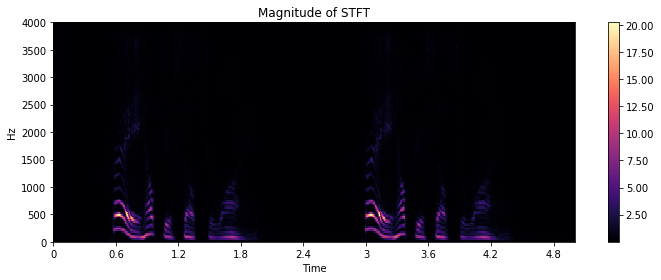

In [5]:


np.random.seed(0)

first = True
for batch_indices in util.get_batch_indices(np.arange(100), **params):
    X_batch, Y_batch = audiossds[batch_indices]
    if first:
        print(X_batch.shape)
        print(Y_batch.shape)
        X_batch, Y_batch = audionnio.audio_to_nn_input(X_batch), audionnio.audio_to_nn_output(Y_batch)
        print(X_batch.shape)
        print(Y_batch.shape)
        
        out = audionnio.nn_output_to_audio(Y_batch)
        print(out.shape)
        
        audionnio.show_and_play_audio(out[0], t='mag')
    first=False
    